In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-12T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm_750 = []
fwhm_1998NU = []                                 #Listas vazias para salvar os valores do fwhm
fwhm_2000NG11 = []                               
fwhm_2003CP20 = []
fwhm_2009SV12 = []                          
fwhm_2009SV17 = []                          
fwhm_2016TL18 = []                                  
fwhm_2017BL3 = []
fwhm_GD108 = []


#750
for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 1
    if indice > 1 and indice < 98 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_750.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_750.append(float(linha[39:]))
#1998NU  
    elif indice > 99 and indice < 231:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_1998NU.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_1998NU.append(float(linha[39:]))
#200NG11
    elif indice > 232 and indice < 334:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2000NG11.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2000NG11.append(float(linha[39:]))
#2003CP20
    if indice > 334 and indice < 456 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2003CP20.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2003CP20.append(float(linha[39:]))
#2009SV12  
    elif indice > 457 and indice < 494:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2009SV12.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2009SV12.append(float(linha[39:]))
#2009SV17
    elif indice > 495 and indice < 528:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2009SV17.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2009SV17.append(float(linha[39:]))
#2016TL18
    if indice > 528 and indice < 593 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2016TL18.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2016TL18.append(float(linha[39:]))
#2017BL3 
    elif indice > 594 and indice < 689:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2017BL3.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
           fwhm_2017BL3.append(float(linha[39:]))
#GD108
    elif indice > 690:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_GD108.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_GD108.append(float(linha[39:]))
            
fwhm_750 = sorted(fwhm_750)            
fwhm_1998NU = sorted(fwhm_1998NU)
fwhm_2000NG11 = sorted(fwhm_2000NG11)
fwhm_2003CP20 = sorted(fwhm_2003CP20)
fwhm_2009SV12 = sorted(fwhm_2009SV12)
fwhm_2009SV17 = sorted(fwhm_2009SV17)
fwhm_2016TL18 = sorted(fwhm_2016TL18)
fwhm_2017BL3 = sorted(fwhm_2017BL3)
fwhm_GD108 = sorted(fwhm_GD108)

<h1>750</h1>

In [4]:
#imagens usadas no psfmeasure = 18,28,38,48,58,68,78,88,98,108,118

name_750 = '750/750_60s_b2x2-018_R.fit'
imagens_750 = []                                                        #Lista com o nome das imagens

for i in range(0,120,10):
    if i >= 1 and i <100:                                       #Para imagens 010 até 015
        name_750 = '750/750_60s_b2x2-018_R.fit'
        number_750 = name_750[19:20].replace(name_750[19],str(int(name_750[19])+i))
        imagens_750.append('750/750_60s_b2x2-0' + str(number_750) + '_R.fit' )
for i in range(100,120,8):
    if i > 100 and i < 110:                                       #Para imagens 010 até 015
        name_750 = '750/750_60s_b2x2-100_R.fit'
        number_750 = name_750[19:20].replace(name_750[19],str(int(name_750[19])+i))
        imagens_750.append('750/750_60s_b2x2-' + str(number_750) + '_R.fit' )

imagens_750.append('750/750_60s_b2x2-118_R.fit')

In [5]:
datas_750 = []                                                #Lista com as datas

for i in imagens_750:                                         #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                      #Extraindo o header de cada imagem
            datas_750.append(hdul[0].header['DATE-OBS'])
            
tempos_750 = Time(datas_750, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_750 = []                                                                 #Inicializando a lista com os pontos
t_750 = np.empty(len(tempos_750))                                 #Inicializando array para plotar

for i in range(len(tempos_750)):
    dt_750.append(tempos_750[i] - itime)
    t_750[i] = (dt_750[i].value)*24                               #Calculando os valores de dt em HORAS

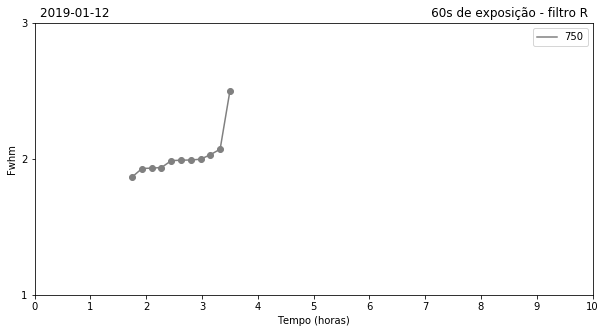

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t_750, fwhm_750, color = 'grey')
plt.plot(t_750, fwhm_750, color = 'grey', label  ='750')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*83 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>1998NU</h1>

In [7]:
#imagens usadas no psfmeasure = 20,40,60,80,100,120,140,160,180,200
name_1998NU = '1998NU/1998NU_40s_b2x2-000_R.fit'
imagens_1998NU = []                                                        #Lista com o nome das imagens

for i in range(20,220,20):       
    if i >= 20 and i <=80:                                       
        number_1998NU = name_1998NU[24:25].replace(name_1998NU[24],str(int(name_1998NU[24])+i))
        imagens_1998NU.append('1998NU/1998NU_40s_b2x2-0' + str(number_1998NU) + '_R.fit' )
for i in range(100,220,20):                                           
    if i > 80 :
        name_1998NU = '1998NU/1998NU_40s_b2x2-000_R.fit'
        number_1998NU = name_1998NU[23:24].replace(name_1998NU[23],str(int(name_1998NU[23])+i))
        imagens_1998NU.append('1998NU/1998NU_40s_b2x2-' + str(number_1998NU) + '_R.fit' )

In [8]:
datas_1998NU = []                                                #Lista com as datas

for i in imagens_1998NU:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_1998NU.append(hdul[0].header['DATE-OBS'])
            
tempos_1998NU = Time(datas_1998NU, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_1998NU = []                                                   #Inicializando a lista com os pontos
t_1998NU = np.empty(len(tempos_1998NU))                                 #Inicializando array para plotar

for i in range(len(tempos_1998NU)):
    dt_1998NU.append(tempos_1998NU[i] - itime)
    t_1998NU[i] = (dt_1998NU[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_1998NU = sorted(t_1998NU)

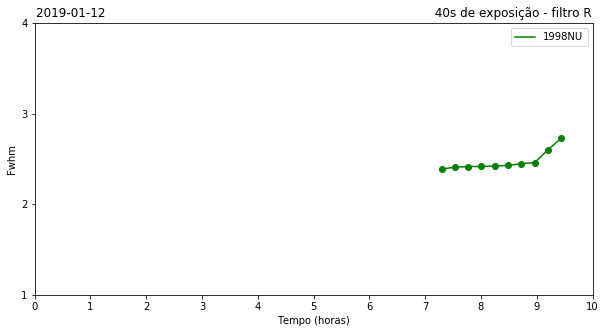

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(t_1998NU, fwhm_1998NU, color = 'green')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label='1998NU')
plt.yticks(np.arange(1, 5, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '40s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2000NG11</h1>

In [10]:
#imagens usadas no psfmeasure = 1,2,3,4,5,6,7,8

name_2000NG11 = '2000NG11/2000NG11_60s_b2x2-001_R.fit'
imagens_2000NG11 = []                                                        #Lista com o nome das imagens

for i in range(0,8,1):       
    number_2000NG11 = name_2000NG11[27:30].replace(name_2000NG11[29],str(int(name_2000NG11[29])+i))   
    imagens_2000NG11.append('2000NG11/2000NG11_60s_b2x2-' + str(number_2000NG11) + '_R.fit' )  

In [11]:
datas_2000NG11 = []                                                #Lista com as datas

for i in imagens_2000NG11:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_2000NG11.append(hdul[0].header['DATE-OBS'])
            
tempos_2000NG11 = Time(datas_2000NG11, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2000NG11 = []                                                   #Inicializando a lista com os pontos
t_2000NG11 = np.empty(len(tempos_2000NG11))                                 #Inicializando array para plotar

for i in range(len(tempos_2000NG11)):
    dt_2000NG11.append(tempos_2000NG11[i] - itime)
    t_2000NG11[i] = (dt_2000NG11[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_2000NG11 = sorted(t_2000NG11)

In [12]:
len(t_2000NG11)

8

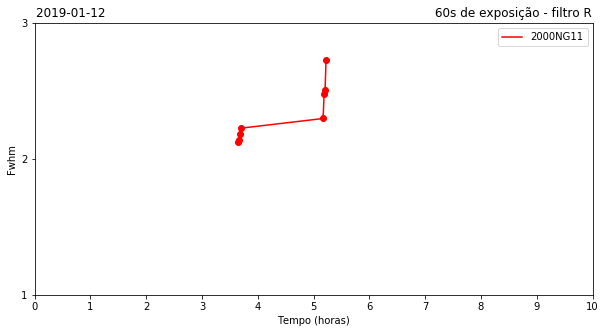

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(t_2000NG11, fwhm_2000NG11, color = 'red')
plt.plot(t_2000NG11, fwhm_2000NG11, color = 'red', label  ='2000NG11')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2003CP20</h1>

In [14]:
#imagens usadas no psfmeasure = 1,2,3,4,5,6,7,8,9,10

name_2003CP20 = '2003CP20/2003CP20_60s_b2x2-001_R.fit'
imagens_2003CP20 = []                                                        #Lista com o nome das imagens

for i in range(0,9,1):       
        number_2003CP20 = name_2003CP20[27:30].replace(name_2003CP20[29],str(int(name_2003CP20[29])+i))   
        imagens_2003CP20.append('2003CP20/2003CP20_60s_b2x2-' + str(number_2003CP20) + '_R.fit' )

imagens_2003CP20.append('2003CP20/2003CP20_60s_b2x2-010_R.fit')

In [15]:
datas_2003CP20 = []                                                #Lista com as datas

for i in imagens_2003CP20:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2003CP20.append(hdul[0].header['DATE-OBS'])
            
tempos_2003CP20 = Time(datas_2003CP20, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2003CP20 = []                                                                 #Inicializando a lista com os pontos
t_2003CP20 = np.empty(len(tempos_2003CP20))                                 #Inicializando array para plotar

for i in range(len(tempos_2003CP20)):
    dt_2003CP20.append(tempos_2003CP20[i] - itime)
    t_2003CP20[i] = (dt_2003CP20[i].value)*24                               #Calculando os valores de dt em HORAS

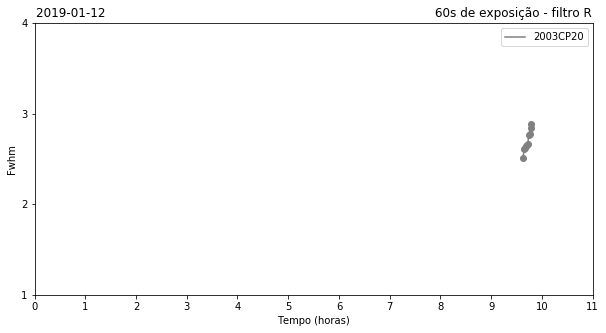

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(t_2003CP20, fwhm_2003CP20, color = 'grey')
plt.plot(t_2003CP20, fwhm_2003CP20, color = 'grey', label  ='2003CP20')
plt.yticks(np.arange(1, 5, 1)) 
plt.xticks(np.arange(0, 12, 1)) 
plt.title('2019-01-12' + ' '*85 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2009SV12</h1>

In [17]:
#imagens usadas no psfmeasure = 1,2,3,4

name_2009SV12 = '2009SV12/2009SV12_70s_b2x2-001_R.fit'
imagens_2009SV12 = []                                                        #Lista com o nome das imagens

for i in range(0,4,1):       
    number_2009SV12 = name_2009SV12[27:30].replace(name_2009SV12[29],str(int(name_2009SV12[29])+i))   
    imagens_2009SV12.append('2009SV12/2009SV12_70s_b2x2-' + str(number_2009SV12) + '_R.fit' )        

In [18]:
datas_2009SV12 = []                                                #Lista com as datas

for i in imagens_2009SV12:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2009SV12.append(hdul[0].header['DATE-OBS'])
            
tempos_2009SV12 = Time(datas_2009SV12, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2009SV12 = []                                                                 #Inicializando a lista com os pontos
t_2009SV12 = np.empty(len(tempos_2009SV12))                                 #Inicializando array para plotar

for i in range(len(tempos_2009SV12)):
    dt_2009SV12.append(tempos_2009SV12[i] - itime)
    t_2009SV12[i] = (dt_2009SV12[i].value)*24                               #Calculando os valores de dt em HORAS

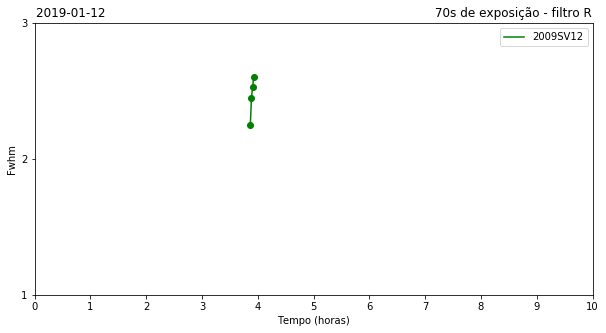

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(t_2009SV12, fwhm_2009SV12, color = 'green')
plt.plot(t_2009SV12, fwhm_2009SV12, color = 'green', label  ='2009SV12')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '70s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2009SV17</h1>

In [20]:
#imagens usadas no psfmeasure = 1,2,3,4

name_2009SV17 = '2009SV17/2009SV17_70s_b2x2-001_R.fit'
imagens_2009SV17 = []                                                        #Lista com o nome das imagens

for i in range(0,4,1):       
    number_2009SV17 = name_2009SV17[27:30].replace(name_2009SV17[29],str(int(name_2009SV17[29])+i))   
    imagens_2009SV17.append('2009SV17/2009SV17_70s_b2x2-' + str(number_2009SV17) + '_R.fit' )        

In [21]:
datas_2009SV17 = []                                                #Lista com as datas

for i in imagens_2009SV17:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2009SV17.append(hdul[0].header['DATE-OBS'])
            
tempos_2009SV17 = Time(datas_2009SV17, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2009SV17 = []                                                                 #Inicializando a lista com os pontos
t_2009SV17 = np.empty(len(tempos_2009SV17))                                 #Inicializando array para plotar

for i in range(len(tempos_2009SV17)):
    dt_2009SV17.append(tempos_2009SV17[i] - itime)
    t_2009SV17[i] = (dt_2009SV17[i].value)*24                               #Calculando os valores de dt em HORAS

t_2009SV17 = sorted(t_2009SV17)

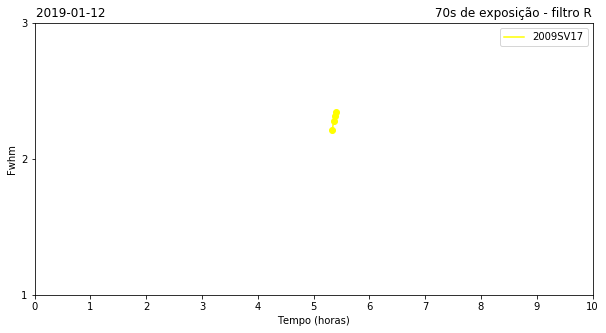

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(t_2009SV17, fwhm_2009SV17, color = 'yellow')
plt.plot(t_2009SV17, fwhm_2009SV17, color = 'yellow', label  ='2009SV17')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '70s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2016TL18</h1>

In [23]:
#imagens usadas no psfmeasure = 1,4,7,10,13,16,19,22

name_2016TL18 = '2016TL18/2016TL18_40s_b2x2-001_NF.fit'
imagens_2016TL18 = []                                                        #Lista com o nome das imagens

for i in range(0,7,3):       
    number_2016TL18 = name_2016TL18[27:30].replace(name_2016TL18[29],str(int(name_2016TL18[29])+i))   
    imagens_2016TL18.append('2016TL18/2016TL18_40s_b2x2-' + str(number_2016TL18) + '_NF.fit' )
for i in range(10,25,3):  
    name_2016TL18 = '2016TL18/2016TL18_40s_b2x2-010_NF.fit'
    number_2016TL18 = name_2016TL18[29:30].replace(name_2016TL18[29],str(int(name_2016TL18[29])+i))   
    imagens_2016TL18.append('2016TL18/2016TL18_40s_b2x2-0' + str(number_2016TL18) + '_NF.fit' )        

In [24]:
datas_2016TL18 = []                                                #Lista com as datas

for i in imagens_2016TL18:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2016TL18.append(hdul[0].header['DATE-OBS'])
            
tempos_2016TL18 = Time(datas_2016TL18, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2016TL18 = []                                                                 #Inicializando a lista com os pontos
t_2016TL18 = np.empty(len(tempos_2016TL18))                                 #Inicializando array para plotar

for i in range(len(tempos_2016TL18)):
    dt_2016TL18.append(tempos_2016TL18[i] - itime)
    t_2016TL18[i] = (dt_2016TL18[i].value)*24                               #Calculando os valores de dt em HORAS

t_2016TL18 = sorted(t_2016TL18)

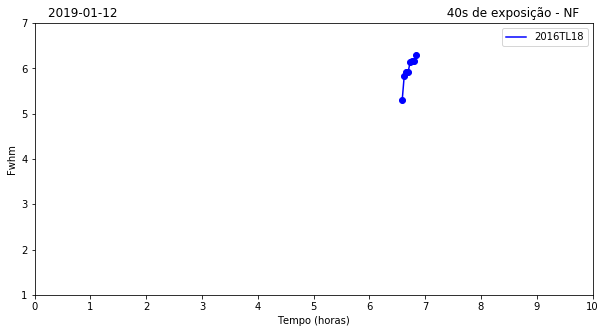

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(t_2016TL18, fwhm_2016TL18, color = 'blue')
plt.plot(t_2016TL18, fwhm_2016TL18, color = 'blue', label  ='2016TL18')
plt.yticks(np.arange(1, 8, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '40s de exposição - NF')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2017BL3</h1>

In [26]:
#imagens usadas no psfmeasure = 3,6,9,12,15,18

name_2017BL3 = '2017BL3/2017BL3_70s_b2x2-003_NF.fit'
imagens_2017BL3 = []                                                        #Lista com o nome das imagens

for i in range(0,9,3):       
    number_2017BL3 = name_2017BL3[25:28].replace(name_2017BL3[27],str(int(name_2017BL3[27])+i))   
    imagens_2017BL3.append('2017BL3/2017BL3_70s_b2x2-' + str(number_2017BL3) + '_NF.fit' )
for i in range(12,20,3):  
    name_2017BL3 = '2017BL3/2017BL3_70s_b2x2-010_NF.fit'
    number_2017BL3 = name_2017BL3[25:26].replace(name_2017BL3[27],str(int(name_2017BL3[27])+i))   
    imagens_2017BL3.append('2017BL3/2017BL3_70s_b2x2-0' + str(number_2017BL3) + '_NF.fit' )

In [27]:
datas_2017BL3 = []                                                #Lista com as datas

for i in imagens_2017BL3:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2017BL3.append(hdul[0].header['DATE-OBS'])
            
tempos_2017BL3 = Time(datas_2017BL3, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2017BL3 = []                                                                 #Inicializando a lista com os pontos
t_2017BL3 = np.empty(len(tempos_2017BL3))                                 #Inicializando array para plotar

for i in range(len(tempos_2017BL3)):
    dt_2017BL3.append(tempos_2017BL3[i] - itime)
    t_2017BL3[i] = (dt_2017BL3[i].value)*24                               #Calculando os valores de dt em HORAS

t_2017BL3 = sorted(t_2017BL3)

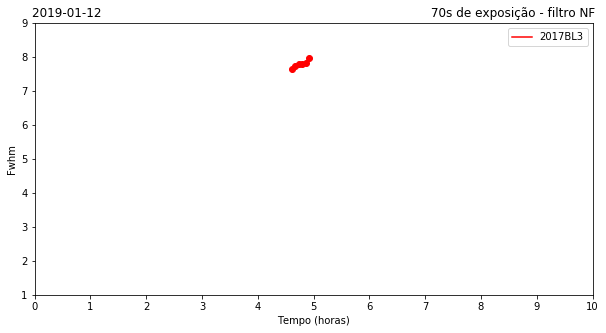

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(t_2017BL3, fwhm_2017BL3, color = 'red')
plt.plot(t_2017BL3, fwhm_2017BL3, color = 'red', label  ='2017BL3')
plt.yticks(np.arange(1, 10, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '70s de exposição - filtro NF')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>GD108</h1>

In [29]:
#imagens usadas no psfmeasure = 1,2,3,4,5,6,7,8,9,10

name_GD108 = 'GD108/GD108_10s_b2x2-001_R.fit'
imagens_GD108 = []                                                        #Lista com o nome das imagens

for i in range(0,9,1):
    if i < 9:                                                      #Para imagens 001 ate 009 
        number_GD108 = name_GD108[22:24].replace(name_GD108[23],str(int(name_GD108[23])+i))   
        imagens_GD108.append('GD108/GD108_10s_b2x2-0' + str(number_GD108) + '_R.fit' )
imagens_GD108.append('GD108/GD108_10s_b2x2-010_R.fit')

In [30]:
datas_GD108 = []                                                #Lista com as datas

for i in imagens_GD108:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_GD108.append(hdul[0].header['DATE-OBS'])
            
tempos_GD108 = Time(datas_GD108, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_GD108 = []                                                                 #Inicializando a lista com os pontos
t_GD108 = np.empty(len(tempos_GD108))                                 #Inicializando array para plotar

for i in range(len(tempos_GD108)):
    dt_GD108.append(tempos_GD108[i] - itime)
    t_GD108[i] = (dt_GD108[i].value)*24                               #Calculando os valores de dt em HORAS

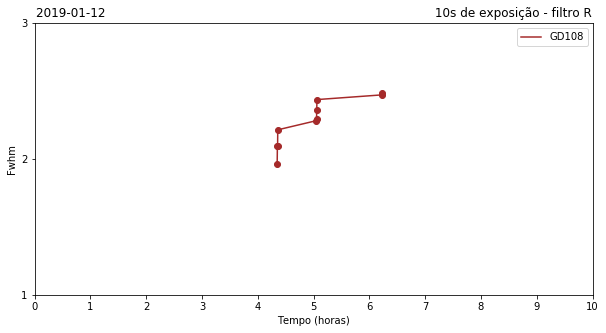

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(t_GD108, fwhm_GD108, color = 'brown')
plt.plot(t_GD108, fwhm_GD108, color = 'brown', label  ='GD108')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '10s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

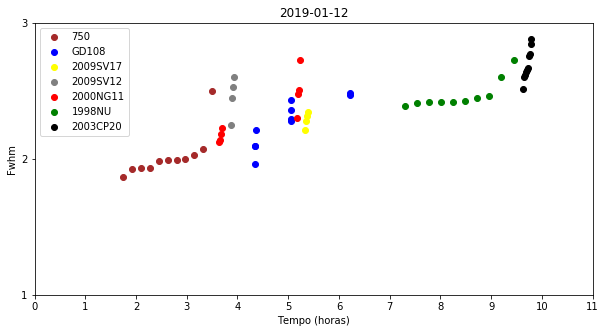

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(t_750, fwhm_750, color = 'brown', label = '750')
plt.scatter(t_GD108, fwhm_GD108, color = 'blue', label = 'GD108')
plt.scatter(t_2009SV17, fwhm_2009SV17, color = 'yellow', label = '2009SV17')
plt.scatter(t_2009SV12, fwhm_2009SV12, color = 'grey', label = '2009SV12')
plt.scatter(t_2000NG11, fwhm_2000NG11, color = 'red', label = '2000NG11')
plt.scatter(t_1998NU, fwhm_1998NU, color = 'green', label = '1998NU')
plt.scatter(t_2003CP20, fwhm_2003CP20, color = 'black', label = '2003CP20')
#plt.scatter(t_2016TL18, fwhm_2016TL18, color = 'silver', label = '2016TL18')  ESTRANHOS!!!!
#plt.scatter(t_2017BL3, fwhm_2017BL3, color = 'coral', label = '2017BL3')

plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 12, 1)) 
plt.title('2019-01-12')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-12_scatterfwhmxtime.png')
plt.legend()
plt.show()

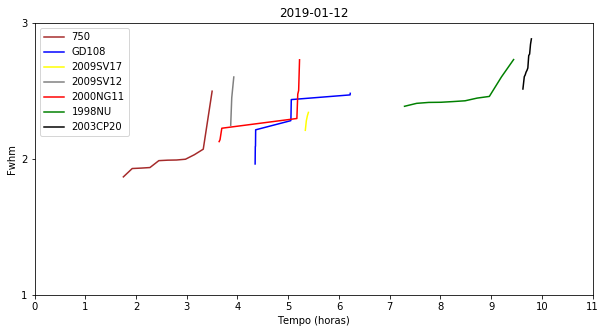

In [33]:
plt.figure(figsize=(10,5))
plt.plot(t_750, fwhm_750, color = 'brown', label = '750')
plt.plot(t_GD108, fwhm_GD108, color = 'blue', label = 'GD108')
plt.plot(t_2009SV17, fwhm_2009SV17, color = 'yellow', label = '2009SV17')
plt.plot(t_2009SV12, fwhm_2009SV12, color = 'grey', label = '2009SV12')
plt.plot(t_2000NG11, fwhm_2000NG11, color = 'red', label = '2000NG11')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label = '1998NU')
plt.plot(t_2003CP20, fwhm_2003CP20, color = 'black', label = '2003CP20')
#plt.plot(t_2016TL18, fwhm_2016TL18, color = 'silver', label = '2016TL18')
#plt.plot(t_2017BL3, fwhm_2017BL3, color = 'coral', label = '2017BL3')

plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 12, 1)) 
plt.title('2019-01-12')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-12_plotfwhmxtime.png')
plt.legend()
plt.show()

In [34]:
fwhm = fwhm_1998NU + fwhm_2000NG11 + fwhm_2009SV17 + fwhm_2009SV12 + fwhm_GD108 + fwhm_2003CP20 + fwhm_2016TL18 + fwhm_2016TL18 + fwhm_750
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

3.146909589041096
2.4597
